In [73]:
# hackathon train -> # train?
import pandas as pd
df1 = pd.read_csv("/workspace/COMP/QIA/hackathon_train.csv", encoding="cp949")
df2 = pd.read_excel("/workspace/COMP/QIA2/train_data.xlsx")
df3 = pd.read_csv("/workspace/COMP/QIA/hackathon_test_for_user.csv", encoding="cp949")
df4 = pd.read_excel("/workspace/COMP/QIA2/test_data.xlsx")

df1['Long_Answer'] = df1['Answer'].map(lambda x: x[x.index(">")+2:].strip())
df3['Long_Answer'] = df3['Answer'].map(lambda x: x[x.index(">")+2:].strip())

# process short answer
def proc_sa(x):
    tmp = x[:x.index(">")+1].strip()
    if "아니다" in tmp or "아니요" in tmp or "어렵다" in tmp or "아니오" in tmp:
        return "아니다"
    elif "그렇다" in tmp or "그렇자" in tmp:
        return "그렇다"
    elif "중립" in tmp or "중랍" in tmp or "중간" in tmp or "보통" in tmp:
        return "중립"
    else:
        print(tmp)
        raise ValueError

df1['Short_Answer'] = df1['Answer'].map(lambda x: proc_sa(x))
df3['Short_Answer'] = df3['Answer'].map(lambda x: proc_sa(x))


In [74]:
# https://ddnews.co.kr/mbti-%EC%A7%88%EB%AC%B8-%EB%A6%AC%EC%8A%A4%ED%8A%B8/ 13, 16, 17, 14
q_category = [0, 1, 2, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 3, 0, 0, 1, 2, 1, 3, 0, 1, 2, 3, 2, 0, 2, 1, 3, 1, 0, 1, 2, 3, 1, 0, 1, 2, 3, 1, 0, 2, 0, 3, 1, 1, 2, 2, 3, 1, 0, 1, 0, 2, 1, 3, 2, 2, 3, 3]

questions= """주기적으로 새로운 친구를 만든다.
자유 시간 중 상당 부분을 다양한 관심사를 탐구하는 데 할애한다.
다른 사람이 울고 있는 모습을 보면 자신도 울고 싶어질 때가 많다.
일이 잘못될 때를 대비해 여러 대비책을 세우는 편이다.
압박감이 심한 환경에서도 평정심을 유지하는 편이다.
파티나 행사에서 새로운 사람에게 먼저 자신을 소개하기보다는 주로 이미 알고 있는 사람과 대화하는 편이다.
하나의 프로젝트를 완전히 완료한 후 다른 프로젝트를 시작하는 편이다.
매우 감상적인 편이다.
일정이나 목록으로 계획을 세우는 일을 좋아한다.
작은 실수로도 자신의 능력이나 지식을 의심하곤 한다.
관심이 가는 사람에게 다가가서 대화를 시작하기가 어렵지 않다.
예술 작품의 다양한 해석에 대해 토론하는 일에는 크게 관심이 없다.
감정보다는 이성을 따르는 편이다.
하루 일정을 계획하기보다는 즉흥적으로 하고 싶은 일을 하는 것을 좋아한다.
다른 사람에게 자신이 어떤 사람으로 보일지 걱정하지 않는 편이다.
단체 활동에 참여하는 일을 즐긴다.
결말을 자신의 방식으로 해석할 수 있는 책과 영화를 좋아한다.
자신보다는 남의 성공을 돕는 일에서 더 큰 만족감을 느낀다.
관심사가 너무 많아 다음에 어떤 일을 해야 할지 모를 때가 있다.
일이 잘못될까봐 자주 걱정하는 편이다.
단체에서 지도자 역할을 맡는 일은 가능한 피하고 싶다.
자신에게 예술적 성향이 거의 없다고 생각한다.
사람들이 감정보다는 이성을 중시했다면 더 나은 세상이 되었으리라고 생각한다.
휴식을 취하기 전에 집안일을 먼저 끝내기를 원한다.
다른 사람의 논쟁을 바라보는 일이 즐겁다.
다른 사람의 주의를 끌지 않으려고 하는 편이다.
감정이 매우 빠르게 변하곤 한다.
자신만큼 효율적이지 못한 사람을 보면 짜증이 난다.
해야 할 일을 마지막까지 미룰 때가 많다.
사후세계에 대한 질문이 흥미롭다고 생각한다.
혼자보다는 다른 사람과 시간을 보내고 싶어한다.
이론 중심의 토론에는 관심이 없으며 원론적인 이야기는 지루하다고 생각한다.
자신과 배경이 완전히 다른 사람에게도 쉽게 공감할 수 있다.
결정을 내리는 일을 마지막까지 미루는 편이다.
이미 내린 결정에 대해서는 다시 생각하지 않는 편이다.
혼자만의 시간을 보내기보다는 즐거운 파티와 행사로 일주일의 피로를 푸는 편이다.
미술관에 가는 일을 좋아한다.
다른 사람의 감정을 이해하기 힘들 때가 많다.
매일 할 일을 계획하는 일을 좋아한다.
불안함을 느낄 때가 거의 없다.
전화 통화를 거는 일은 가능한 피하고 싶다.
자신의 의견과 매우 다른 의견을 이해하기 위해 많은 시간을 할애하곤 한다.
친구에게 먼저 만나자고 연락하는 편이다.
계획에 차질이 생기면 최대한 빨리 계획으로 돌아가기 위해 노력한다.
오래전의 실수를 후회할 때가 많다.
인간의 존재와 삶의 이유에 대해 깊이 생각하지 않는 편이다.
감정을 조절하기보다는 감정에 휘둘리는 편이다.
상대방의 잘못이라는 것이 명백할 때도 상대방의 체면을 살려주기 위해 노력한다.
계획에 따라 일관성 있게 업무를 진행하기보다는 즉흥적인 에너지로 업무를 몰아서 처리하는 편이다.
상대방이 자신을 높게 평가하면 나중에 상대방이 실망하게 될까 걱정하곤 한다.
대부분의 시간을 혼자서 일할 수 있는 직업을 원한다.
철학적인 질문에 대해 깊게 생각하는 일은 시간 낭비라고 생각한다.
조용하고 사적인 장소보다는 사람들로 붐비고 떠들썩한 장소를 좋아한다.
상대방의 감정을 바로 알아차릴 수 있다.
무엇인가에 압도당하는 기분을 느낄 때가 많다.
단계를 건너뛰는 일 없이 절차대로 일을 완수하는 편이다.
논란이 되거나 논쟁을 불러일으킬 수 있는 주제에 관심이 많다.
자신보다 다른 사람에게 더 필요한 기회라고 생각되면 기회를 포기할 수도 있다.
마감 기한을 지키기가 힘들다.
일이 원하는 대로 진행될 것이라는 자신감이 있다.""".split("\n")

In [75]:
# Explore I vs E.

import pandas as pd
import matplotlib.pyplot as plt

q_list = [i+1 for i in range(len(questions)) if q_category[i] == 3] # Change this also
df = df1[df1.Q_number.isin(q_list)]

I_group = df[df['MBTI'].str[0] == 'I']
E_group = df[df['MBTI'].str[0] == 'E']
S_group = df[df['MBTI'].str[1] == 'S']
N_group = df[df['MBTI'].str[1] == 'N']
T_group = df[df['MBTI'].str[2] == 'T']
F_group = df[df['MBTI'].str[2] == 'F']
J_group = df[df['MBTI'].str[3] == 'J']
P_group = df[df['MBTI'].str[3] == 'P']

I_group_question_counts = I_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
E_group_question_counts = E_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
S_group_question_counts = S_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
N_group_question_counts = N_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
T_group_question_counts = T_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
F_group_question_counts = F_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
J_group_question_counts = J_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)
P_group_question_counts = P_group.groupby('Q_number')['Short_Answer'].value_counts().unstack().fillna(0)

In [79]:
answer_categories = ["Yes", "No", "Neutral"]

# question_numbers = I_group_question_counts.index
# data = I_group_question_counts.values / 120

# question_numbers = E_group_question_counts.index
# data = E_group_question_counts.values / 120

# question_numbers = S_group_question_counts.index
# data = S_group_question_counts.values / 120

# question_numbers = N_group_question_counts.index
# data = N_group_question_counts.values / 120

# question_numbers = T_group_question_counts.index
# data = T_group_question_counts.values / 120

# question_numbers = F_group_question_counts.index
# data = F_group_question_counts.values / 120

# question_numbers = J_group_question_counts.index
# data = J_group_question_counts.values / 120

question_numbers = P_group_question_counts.index
data = P_group_question_counts.values / 120

In [80]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

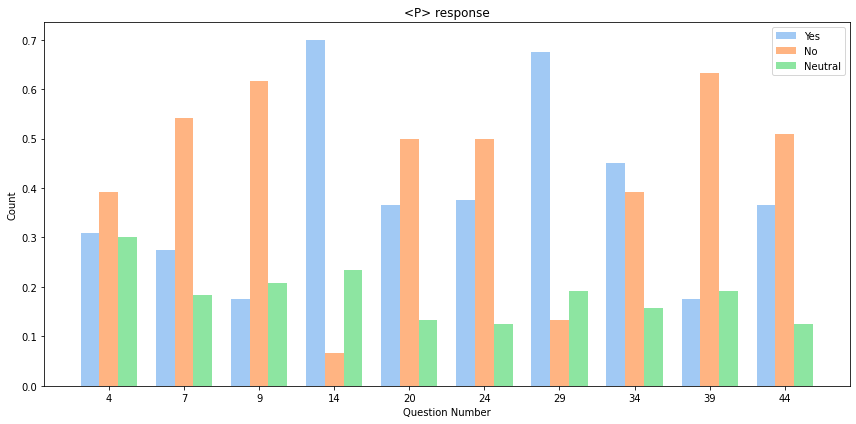

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the width of each bar
bar_width = 0.25

# Create the x-axis positions for each group of bars
x_positions = np.arange(len(question_numbers))

# Set the color palette
colors = sns.color_palette('pastel')[:3]

# Plot the grouped bars
fig, ax = plt.subplots(figsize=(12, 6))

for i, category in enumerate(answer_categories):
    ax.bar(x_positions + i * bar_width, data[:, i], bar_width, label=category, color=colors[i])

# Set the tick positions and labels
ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(question_numbers)

# Set the axis labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Count')
ax.set_title('<P> response')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
